# Check channel weights

author: steeve.laquitaine@epfl.ch  
feedbacks from: joseph.tharayil@epfl.ch  
last modified: 15-08-2023  
regression: None  
status: OK  
display: up-to-date  

**Overview**

- We simulated 1 column (hex_0, 30K cells)
- Channel information is contained in the group `electrodes` of the `.h5` weight file .  The channel contacts are arranged in the columns of `weights["electrodes"]["electrode_grid"]` for each neuron.

note: Jo has fixed some issues (so different from CNS_2023's version)

### Setup

Activate `envs/npx_10m_384ch_unit_classes.txt`

In [2]:
import os
import h5py
from matplotlib import pyplot as plt
import numpy as np

PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config
from src.nodes.load import load_campaign_params
from src.nodes.dataeng.silico.filtering import filter_microcircuit_cells

# SET EXPERIMENT PARAMETERS
EXP = "silico_neuropixels"
SIMULATION_DATE = "2023_10_18"

# SET RUN PARAMETERS
N_CONTACTS = 384

# SETUP EXPERIMENT CONFIG
data_conf, param_conf = get_config(EXP, SIMULATION_DATE).values()

# GET PATHS
WEIGHT_PATH = data_conf["campaign"]["source_weights"]

2024-03-14 12:17:02,144 - root - utils.py - get_config - INFO - Reading experiment config.
2024-03-14 12:17:02,168 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Custom functions

In [3]:
def euclidean_distance(coord_1, coord_2):
    return np.sqrt(np.sum((coord_1 - coord_2) ** 2))

### (1m) Load and describe weights

* `neuron_ids` does not contain channel information.
* `offsets` does not contain channel information
* `sec_ids` does not contain channel information
* shape is number of segments index x number of channel locations
* Channel information is contained in `electrodes`.  The channel contacts are arranged in the columns of `weights["electrodes"]["electrode_grid"]` for each neuron.
* Check metadata e.g.,"Neuropixels-384_0" in `weights["electrodes"]` and the contact columns of each neurons matrix in e.g., `weights["electrodes"]["electrode_grid"]["301"]` for e.g., neuron "301"

In [4]:
# load weights
weights = h5py.File(WEIGHT_PATH, "r")
print("source weight file read path:", WEIGHT_PATH)

# describe keys
print("\nWeight keys:", weights.keys())

# describe neuron_ids key type
print("neuron_ids (type):", type(weights["neuron_ids"]))

# shape (30190 units)
print("neuron_ids (count):", weights["neuron_ids"].shape)

# WARNING ! takes 40 min
# describe "offsets" type
# print("offsets (type):", type(weights["offsets"]))
# count "offsets" component keys --> returns 211,712 neurons
# print("offsets (count):", len(weights["offsets"].keys()))

# get type of offset components
print("'301' (type):", type(weights["offsets"]["301"]))

# get shape (106)
print("offsets (shape):", weights["offsets"]["301"].shape)

# get type of "sec_ids"
print("sec_ids (type):", type(weights["sec_ids"]))

# count components --> returns 211,712 neurons (stats: takes 1 min)
print("sec_ids (cell count):", len(weights["sec_ids"].keys()))

# count a neuron's component (337)
print("'301' (shape):", weights["sec_ids"]["301"].shape)

# describe "electrodes" structure type (see 1 for "group" type)
print("\nElectrodes (type):", type(weights["electrodes"]))

# describe electrodes group keys ['Neuropixels-384_0', 'Neuropixels-384_1', ...]
print("\nElectrodes:\n-", list(weights["electrodes"].keys())[:10], "...")
print("-", list(weights["electrodes"].keys())[-1])

# describe "electrode_grid" (337, 384)
print(
    "\nelectrode_grid:\n- type:",
    weights["electrodes"].get("electrode_grid", getclass=True),
)
print("- shape:", weights["electrodes"]["electrode_grid"]["301"].shape)

## count "electrode_grid" component keys (stats: takes 10 min) -> returns 211,712 neurons
# print("\n", len(weights["electrodes"]["electrode_grid"].keys()))
# weights["electrodes"]["electrode_grid"].visititems(print)

# analye electrodes components
print("\nNeuropixels-384_0:\n-type:", type(weights["electrodes"]))
print(
    "\nNeuropixels-384_0 components:\n-type:",
    weights["electrodes"]["Neuropixels-384_0"].keys(),
)
print("\nlayer:\n-type:", type(weights["electrodes"]["Neuropixels-384_0"]["layer"]))
print("-shape:", weights["electrodes"]["Neuropixels-384_0"]["layer"].shape)

# report location
print(
    "\nlocation:\n-type:", type(weights["electrodes"]["Neuropixels-384_0"]["location"])
)
print("-type:", weights["electrodes"]["Neuropixels-384_0"]["location"].shape)
print("-content:", weights["electrodes"]["Neuropixels-384_0"]["location"][:])

# report offset
print("\noffset:\n-type:", type(weights["electrodes"]["Neuropixels-384_0"]["offset"]))
print("-shape:", weights["electrodes"]["Neuropixels-384_0"]["offset"].shape)

# report region
print("\nregion:\n-type:", type(weights["electrodes"]["Neuropixels-384_0"]["region"]))
print("-shape:", weights["electrodes"]["Neuropixels-384_0"]["region"].shape)

# report type
print("\ntype:\n-type:", type(weights["electrodes"]["Neuropixels-384_0"]["type"]))
print("-shape:", weights["electrodes"]["Neuropixels-384_0"]["type"].shape)

source weight file read path: /gpfs/bbp.cscs.ch/project/proj68/scratch/tharayil/newCoeffs/b3122c45-e2d9-4205-821c-88f28791dc69/0/neuropixels_full_O1/coeffsneuropixels.h5

Weight keys: <KeysViewHDF5 ['electrodes', 'neuron_ids', 'offsets', 'sec_ids']>
neuron_ids (type): <class 'h5py._hl.dataset.Dataset'>
neuron_ids (count): (211712,)
'301' (type): <class 'h5py._hl.dataset.Dataset'>
offsets (shape): (1061,)
sec_ids (type): <class 'h5py._hl.group.Group'>
sec_ids (cell count): 211712
'301' (shape): (209,)

Electrodes (type): <class 'h5py._hl.group.Group'>

Electrodes:
- ['Neuropixels-384_0', 'Neuropixels-384_1', 'Neuropixels-384_10', 'Neuropixels-384_100', 'Neuropixels-384_101', 'Neuropixels-384_102', 'Neuropixels-384_103', 'Neuropixels-384_104', 'Neuropixels-384_105', 'Neuropixels-384_106'] ...
- electrode_grid

electrode_grid:
- type: <class 'h5py._hl.group.Group'>
- shape: (209, 385)

Neuropixels-384_0:
-type: <class 'h5py._hl.group.Group'>

Neuropixels-384_0 components:
-type: <KeysView

Each neuron weights are contained in a matrix of segment index x channel location.

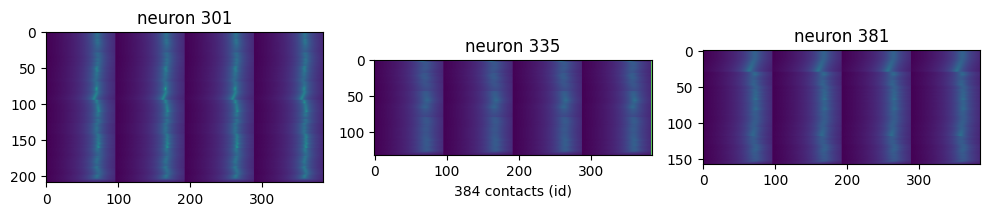

In [5]:
# plot channel contact channel weights
figures, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(np.log10(weights["electrodes"]["electrode_grid"]["301"][:, :]))
axes[0].set_title("neuron 301")
axes[1].imshow(np.log10(weights["electrodes"]["electrode_grid"]["335"][:, :]))
axes[1].set_title("neuron 335")
axes[1].set_xlabel("384 contacts (id)")
axes[2].imshow(np.log10(weights["electrodes"]["electrode_grid"]["381"][:, :]))
axes[2].set_title("neuron 381")
plt.tight_layout()

### Compute data to plot recordings sites

Locations are shown on the x-y plane.

We calculated the euclidean distance between two nearest horizontal (x_pitch) and vertical (y_pitch) contacts:

In [6]:
# check that the number sites is 384 (there is 1 more test contact)
assert (
    N_CONTACTS == weights["electrodes"]["electrode_grid"]["301"].shape[1] - 1
), "The number of contacts is unexpected"

# set site ids
all_contacts_ids = np.arange(0, N_CONTACTS)

# get all site locations
all_contact_locations = []
for all_contact_i in all_contacts_ids:
    all_contact_locations.append(
        eval(
            f"""weights["electrodes"]["Neuropixels-384_{all_contact_i}"]["location"][:]"""
        ).tolist()
    )
all_contact_locations = np.array(all_contact_locations)

# Get coordinates of a sample of the column cells (else rendering last a while)
simulation = load_campaign_params(data_conf)
microcircuit = filter_microcircuit_cells(simulation)
microcircuit_coord = microcircuit["soma_location"].sample(
    n=1000, axis=0, random_state=1
)

# get y_pitch (distance between the two closest contacts within the same column)
print("\nPicthes are:\n")
y_pitch = euclidean_distance(all_contact_locations[0, :], all_contact_locations[1, :])
print("y_pitch", y_pitch)

# euclidean distance between nearest sites (e.g., 0 and 96)
eu_distance = euclidean_distance(
    all_contact_locations[0, :], all_contact_locations[96, :]
)
print("euclidean distance", eu_distance)

# get cell layers
cell_layers = simulation["circuit"].cells.get(
    group=microcircuit["gid"], properties="layer"
)

/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [



Picthes are:

y_pitch 39.9994848091821
euclidean distance 25.61213552205265


### Plot

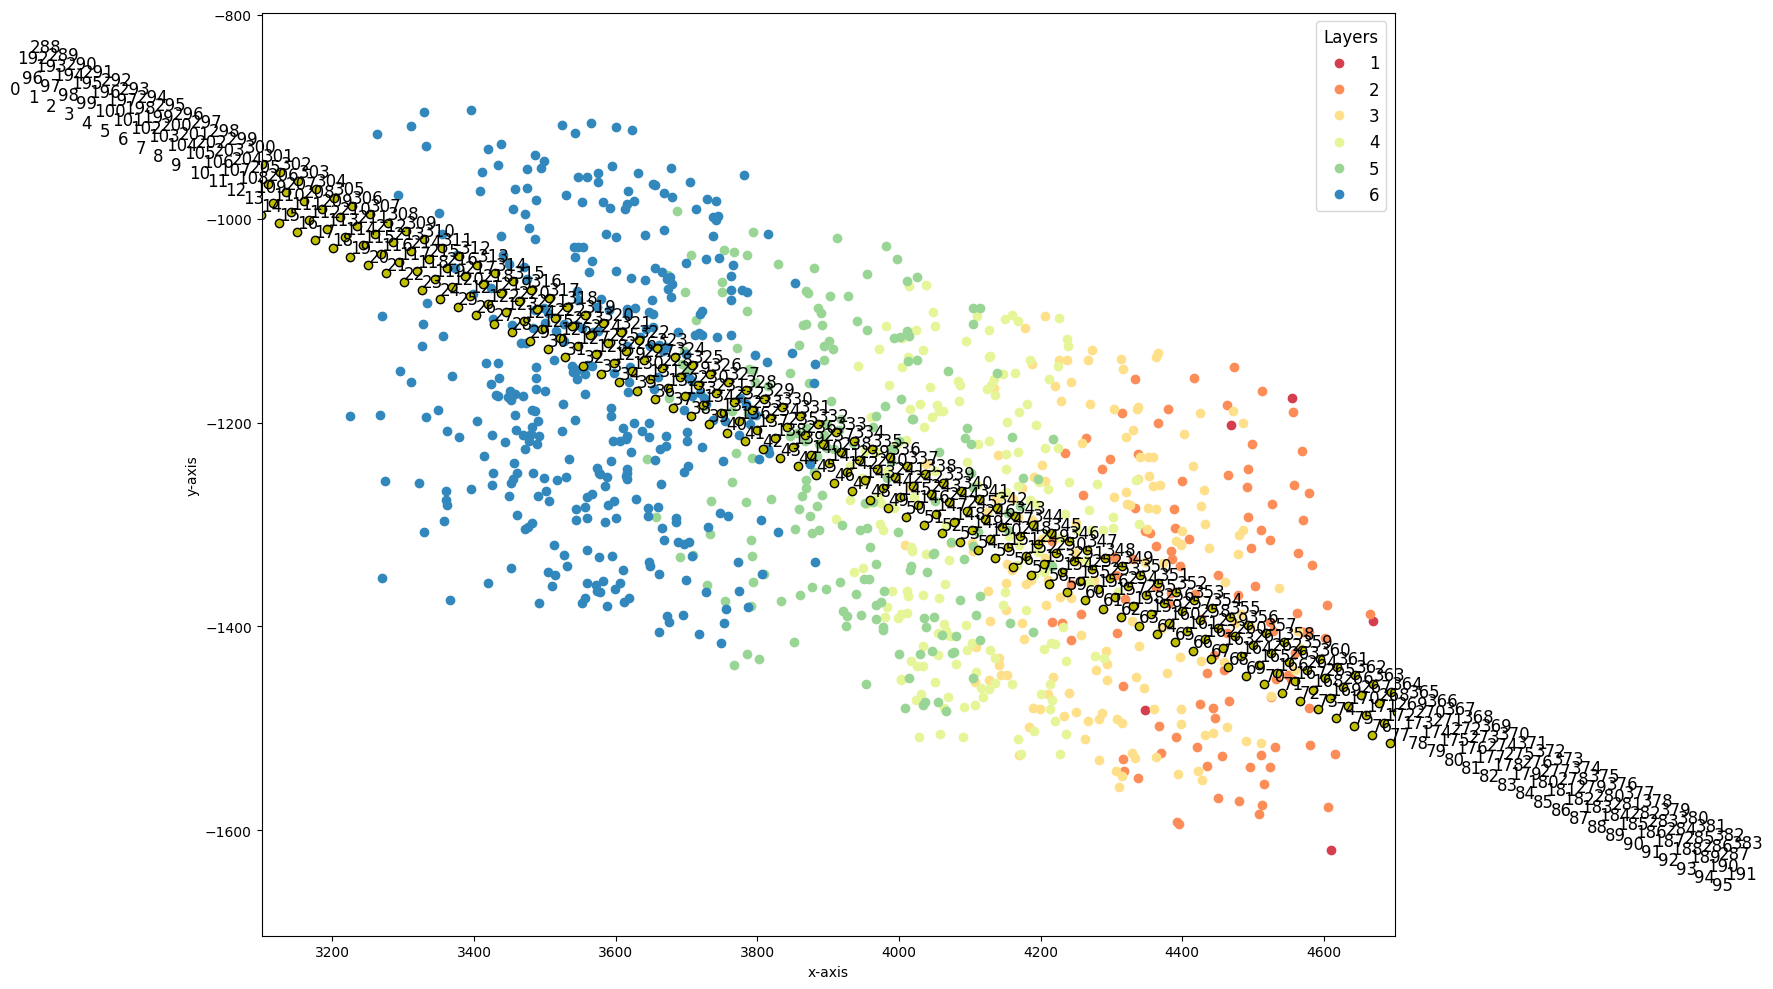

In [28]:
# angle view 4
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

# plot cells colored by layer
layer_color = [
    (0, 0, 0),
    (213 / 255, 62 / 255, 79 / 255),
    (252 / 255, 141 / 255, 89 / 255),
    (254 / 255, 224 / 255, 139 / 255),
    (230 / 255, 245 / 255, 152 / 255),
    (153 / 255, 213 / 255, 148 / 255),
    (50 / 255, 136 / 255, 189 / 255),
]

layers = np.sort(cell_layers.unique())

for layer_i in layers:
    ax.plot(
        microcircuit_coord.x[cell_layers == layer_i],
        microcircuit_coord.y[cell_layers == layer_i],
        ".",
        color=layer_color[int(layer_i)],
        markersize=12,
    )

# add contacts
ax.plot(
    all_contact_locations[:, 0],
    all_contact_locations[:, 1],
    marker=".",
    markersize=12,
    color="y",
    markeredgecolor="black",
    linestyle="None",
)

# add contact ids
for ix in range(len(all_contact_locations)):
    ax.text(
        all_contact_locations[ix, 0],
        all_contact_locations[ix, 1] + 3,
        "%s" % (str(all_contacts_ids[ix])),
        size=12,
        zorder=100,
        color="k",
    )
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_xlim([3100, 4700])
plt.tight_layout()
legend = ax.legend(layers, fontsize=12, title="Layers")
plt.setp(legend.get_title(), fontsize=12)
plt.show()

In [29]:
# close file
weights.close()

# References

(1) https://docs.h5py.org/en/latest/high/group.html